In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Monkeypox_Skin_Image_Dataset/Train

chickenpox  measles  monkeypox	normal


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
# o
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
train_dataset_path = '/content/drive/MyDrive/Monkeypox_Skin_Image_Dataset/Train'
validation_dataset_path = '/content/drive/MyDrive/Monkeypox_Skin_Image_Dataset/Test'


In [ ]:

IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)


Found 403 images belonging to 4 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 120 images belonging to 4 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : chickenpox
1 : measles
2 : monkeypox
3 : normal


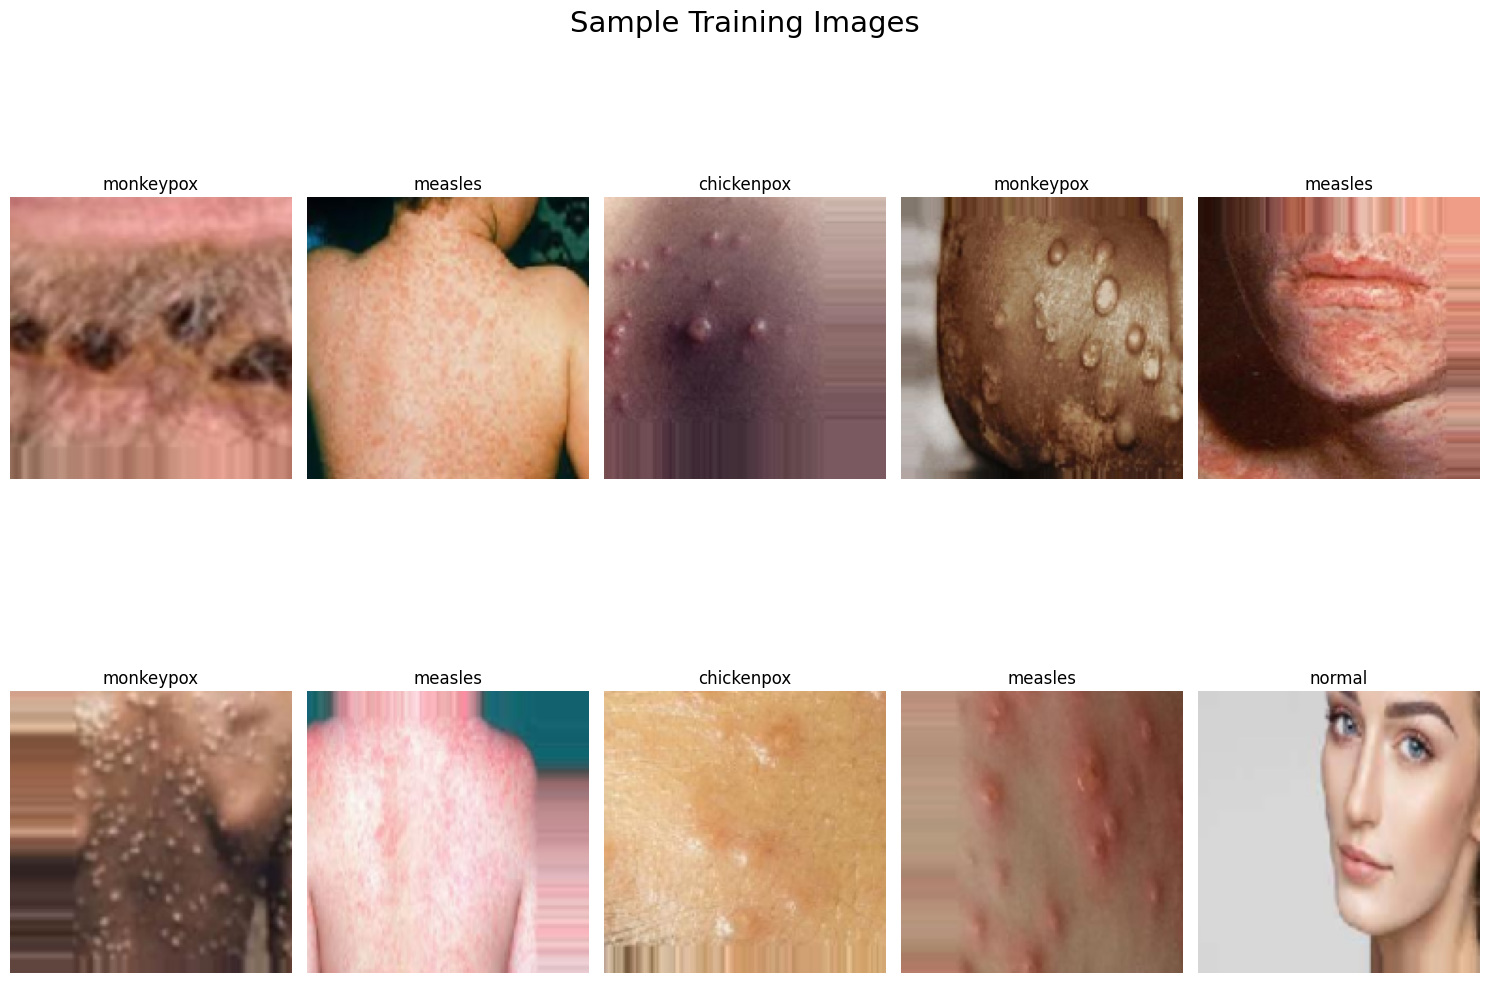

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()
# CLASS_NAMES = ['Chickenpox','Measles','Monkeypoxg','Normal']

In [ ]:
base_model = tf.keras.applications.InceptionV3(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(150,150,3),
                     classifier_activation="softmax"
                     )

base_model.trainable=True

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(150,150,3)),
    base_model,
    tf.keras.layers.BatchNormalization(),  # Removed 'renorm=True'
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:


print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 3, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 3, 3, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,024,804 (87.83 MB)

 Trainable params: 22,986,276 (87.69 MB)

 Non-trainable params: 38,528 (150.50 KB)

None


In [ ]:
!pip uninstall tensorflow-addons -y


In [ ]:
!pip install tensorflow==2.10 tensorflow-addons==0.17


ERROR: Could not find a version that satisfies the requirement tensorflow==2.10 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.10


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.AUC(name='f1')  # No need for tensorflow-addons F1Score
]


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
# cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy']) # Define METRICS as a list of metrics

In [ ]:
history = model.fit (
    train_generator,
    steps_per_epoch=10,

    validation_data=validation_generator,
                    validation_steps=2,
                    epochs=50,verbose = 2,
                    callbacks=[reduce_lr]
    )

Epoch 1/50
10/10 - 171s - 17s/step - accuracy: 0.4625 - loss: 1.1966 - val_accuracy: 0.2344 - val_loss: 10.3867 - learning_rate: 1.0000e-03
Epoch 2/50
10/10 - 37s - 4s/step - accuracy: 0.6042 - loss: 0.9644 - val_accuracy: 0.2188 - val_loss: 24.6706 - learning_rate: 1.0000e-03
Epoch 3/50
10/10 - 75s - 7s/step - accuracy: 0.6384 - loss: 1.0473 - val_accuracy: 0.2969 - val_loss: 36.7951 - learning_rate: 1.0000e-03
Epoch 4/50
10/10 - 41s - 4s/step - accuracy: 0.6250 - loss: 0.8510 - val_accuracy: 0.2656 - val_loss: 41.4522 - learning_rate: 1.0000e-03
Epoch 5/50
10/10 - 72s - 7s/step - accuracy: 0.6775 - loss: 0.9002 - val_accuracy: 0.2500 - val_loss: 53.2287 - learning_rate: 1.0000e-03
Epoch 6/50
10/10 - 23s - 2s/step - accuracy: 0.7812 - loss: 0.7577 - val_accuracy: 0.2188 - val_loss: 64.8726 - learning_rate: 1.0000e-03
Epoch 7/50
10/10 - 144s - 14s/step - accuracy: 0.6906 - loss: 0.8754 - val_accuracy: 0.2188 - val_loss: 183.4838 - learning_rate: 3.1623e-04
Epoch 8/50
10/10 - 39s - 4s/s

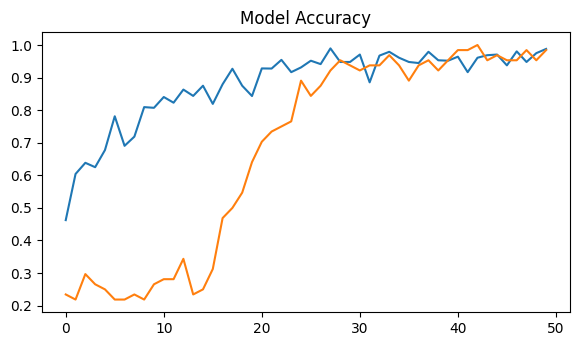

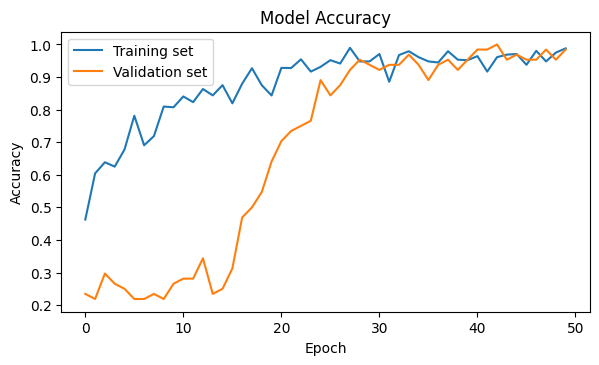

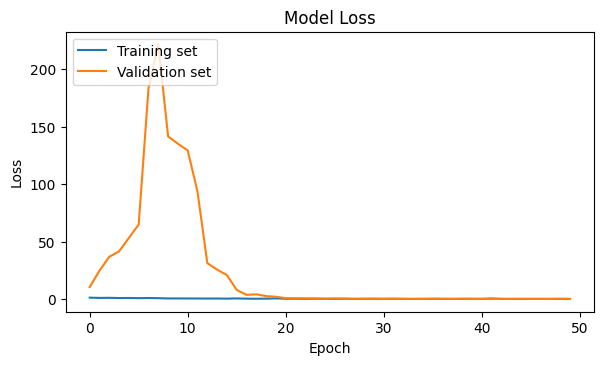

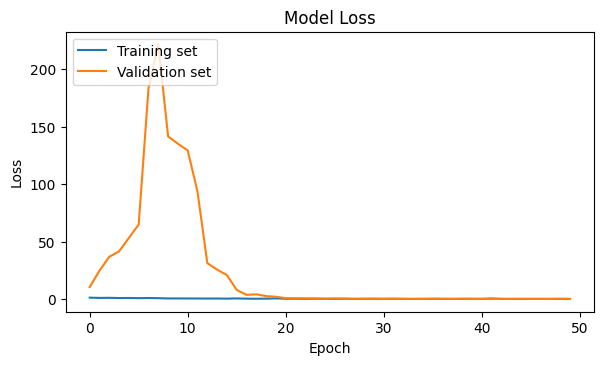

In [ ]:
plt.figure( figsize = (15,8))

plt.subplot(221)
# Accuracy
# Access history from the 'history' variable, not 'model.history'
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.figure( figsize = (15,8))

plt.subplot(221)
# Accuracy
# Access history from the 'history' variable, not 'model.history'
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


# Loss
plt.figure( figsize = (15,8))
plt.subplot(222)
# Access history from the 'history' variable, not 'model.history'
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

# Loss
plt.figure( figsize = (15,8))
plt.subplot(222)
# Access history from the 'history' variable, not 'model.history'
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Define 'lr' inside history.history to avoid the error
if 'lr' not in history.history:
    import numpy as np
    # Assuming constant learning rate used throughout
    lr = float(model.optimizer.learning_rate)
    history.history['lr'] = [lr] * len(history.history['loss'])

learning_rate = history.history['lr']


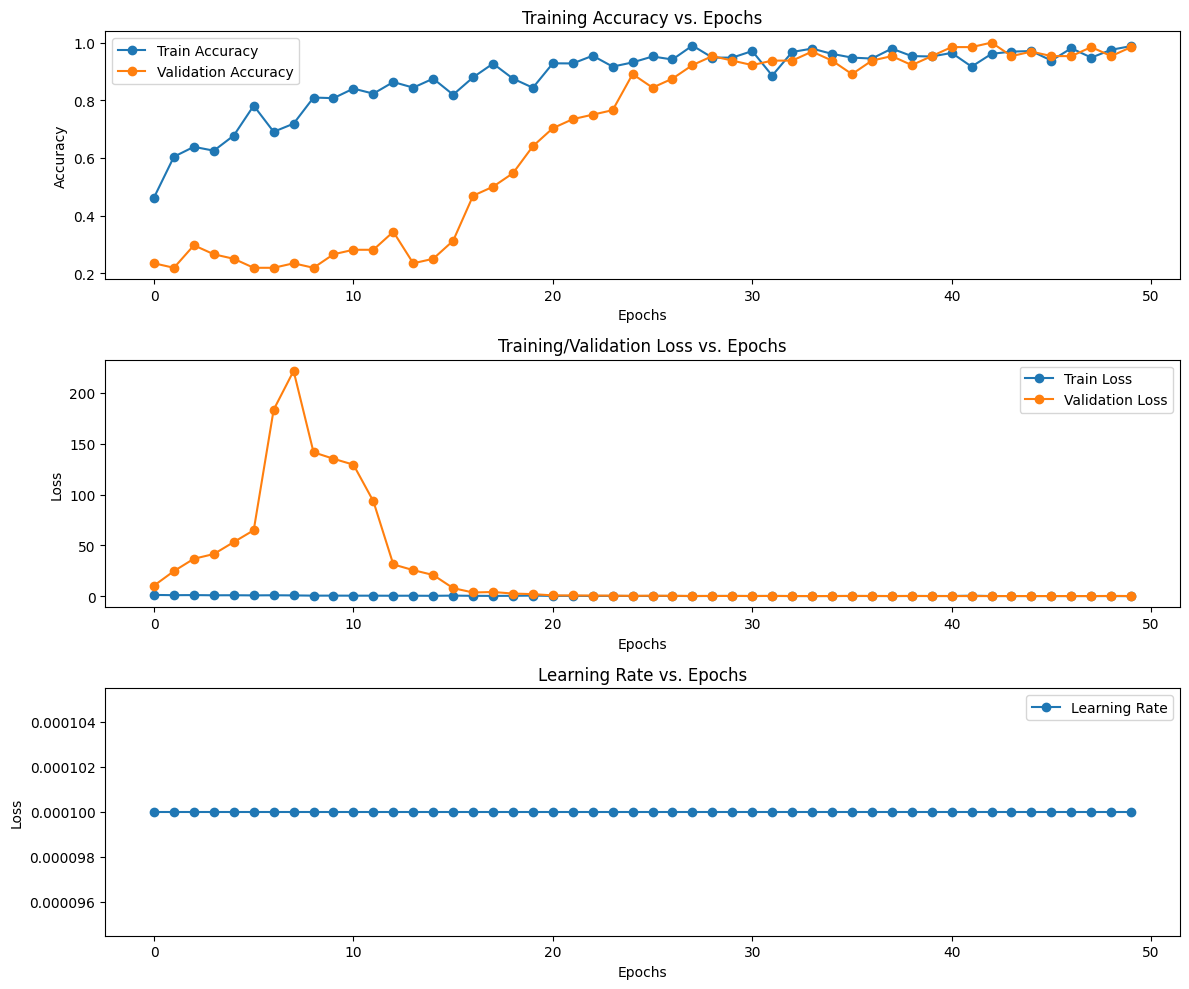

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate', 'lr'])


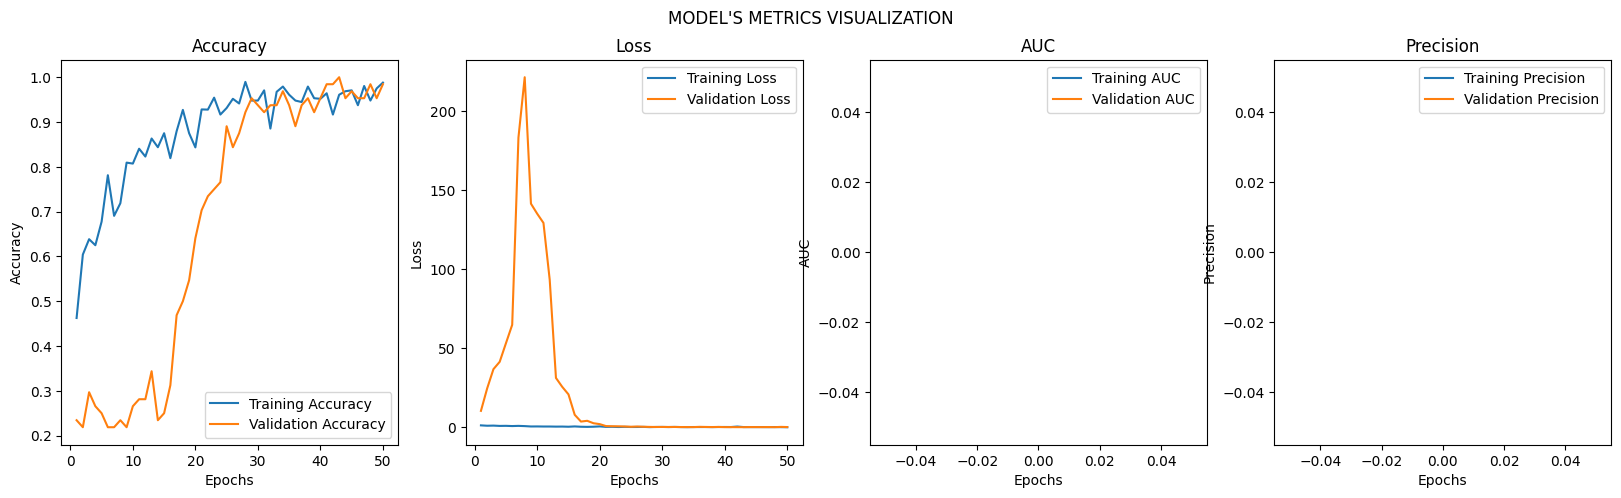

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define and compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', 'Precision'])

# Train the model
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Function to plot training and validation metrics
def Train_Val_Plot(acc, val_acc, loss, val_loss, auc, val_auc, precision, val_precision):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle("MODEL'S METRICS VISUALIZATION")

    ax1.plot(range(1, len(acc) + 1), acc, label='Training Accuracy')
    ax1.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    ax2.plot(range(1, len(loss) + 1), loss, label='Training Loss')
    ax2.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()

    ax3.plot(range(1, len(auc) + 1), auc, label='Training AUC')
    ax3.plot(range(1, len(val_auc) + 1), val_auc, label='Validation AUC')
    ax3.set_title('AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend()

    ax4.plot(range(1, len(precision) + 1), precision, label='Training Precision')
    ax4.plot(range(1, len(val_precision) + 1), val_precision, label='Validation Precision')
    ax4.set_title('Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend()

    plt.show()

# Print available history keys
print(history.history.keys())

# Call the plotting function
Train_Val_Plot(history.history['accuracy'], history.history['val_accuracy'],
               history.history['loss'], history.history['val_loss'],
               history.history.get('auc', history.history.get('AUC', [])),
               history.history.get('val_auc', history.history.get('val_AUC', [])),
               history.history.get('precision', history.history.get('Precision', [])),
               history.history.get('val_precision', history.history.get('val_Precision', [])))


In [ ]:
test_dataset = '/content/drive/MyDrive/Monkeypox_Skin_Image_Dataset/Test'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 120 images belonging to 4 classes.


In [ ]:
predictions = model.predict(test_generator)


4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step


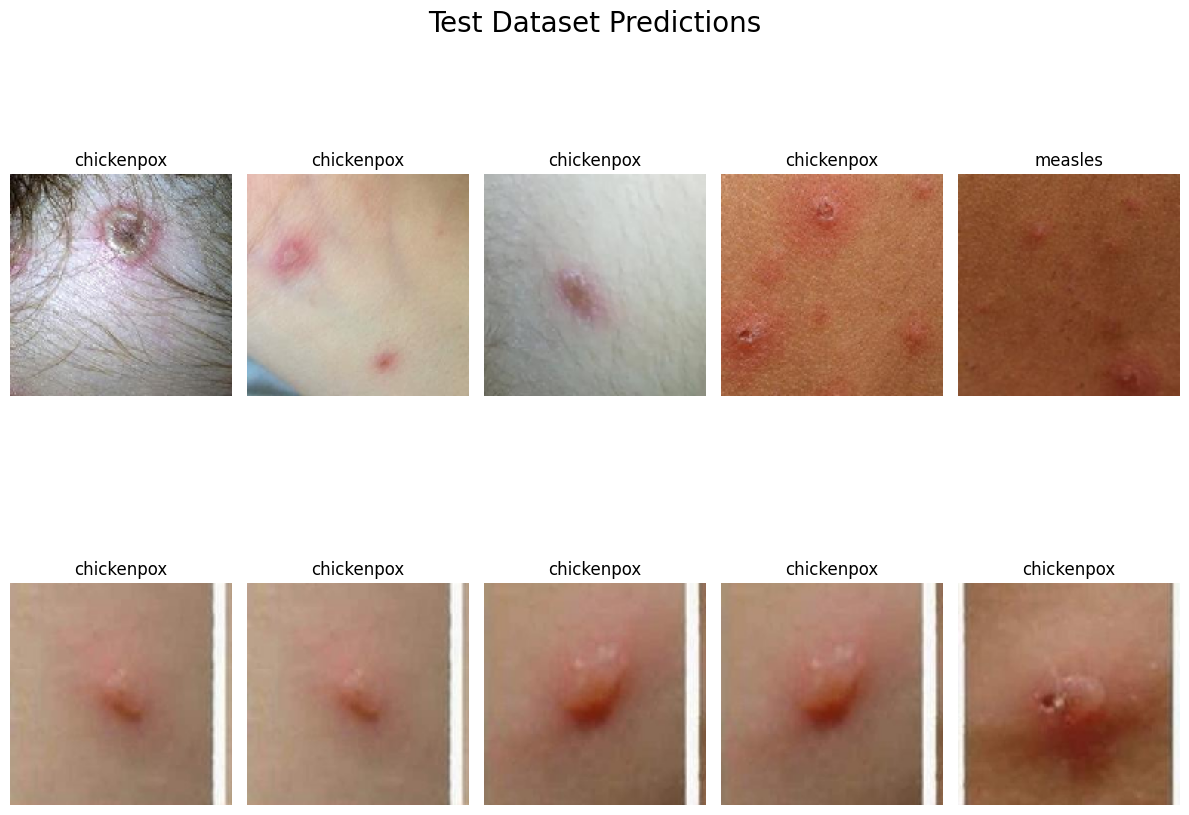

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
train_loss, train_accuracy, train_auc, train_precision  = model.evaluate(train_generator, batch_size=BATCH_SIZE) # Removed train_recall and train_F1_Score

print(f"Train Loss:     {train_loss *100}")
print(f"Train Accuracy: {train_accuracy *100}")
#print(f"Train Precision: {train_precision *100}") # precision metric was not defined when compiling the model.
print(f"Train AUC: {train_auc *100}")
print(f"Train Precision: {train_precision*100}")
#print(f"Train F1_Score: {np.mean(train_F1_Score) *100}")# F1_score was not defined when compiling the model.

13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - AUC: 0.9940 - Precision: 0.9857 - accuracy: 0.9849 - loss: 0.2703
Train Loss:     27.88183093070984
Train Accuracy: 98.26302528381348
Train AUC: 99.60942268371582
Train Precision: 98.50746393203735


In [ ]:
test_loss, test_accuracy, test_auc, test_precision = model.evaluate(test_generator, batch_size=BATCH_SIZE)

print(f"Test Loss:     {test_loss*100}")
print(f"Test Accuracy: {test_accuracy*100}")
print(f"Test AUC: {test_auc*100}")
print(f"Test Precision: {test_precision*100}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - AUC: 0.9952 - Precision: 0.9667 - accuracy: 0.9456 - loss: 0.3738
Test Loss:     35.76925992965698
Test Accuracy: 94.9999988079071
Test AUC: 99.56250190734863
Test Precision: 96.49122953414917


In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes



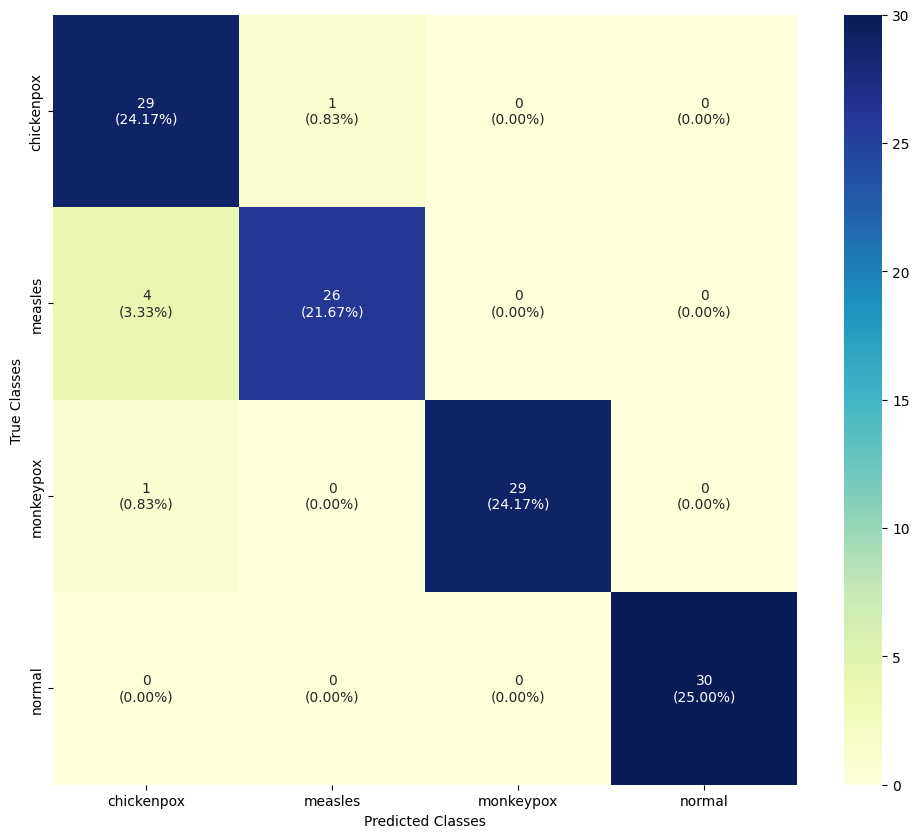

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(4, 4)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

  chickenpox       0.85      0.97      0.91        30
     measles       0.96      0.87      0.91        30
   monkeypox       1.00      0.97      0.98        30
      normal       1.00      1.00      1.00        30

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [ ]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [ ]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]


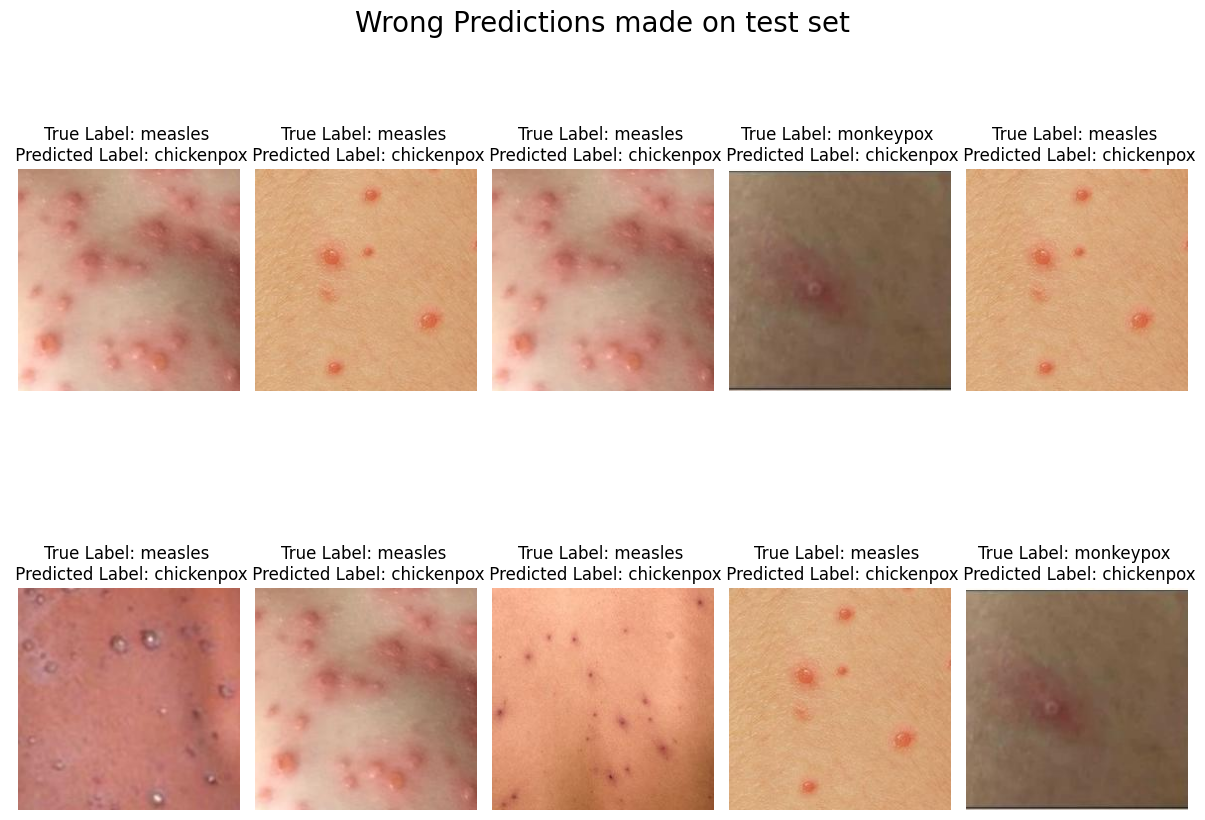

In [ ]:

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

